In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

# Define the path to the Excel file

file_path = r"D:\Projects\PowerBI\Prediction_Data.xlsx"

 

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married            State  Number_of_Referrals  \
0   11340-JAM  Female   21      No  Jammu & Kashmir                    8   
1   11348-MAH  Female   46      No      Maharashtra                   11   
2   11359-AND  Female   28     Yes   Andhra Pradesh                    3   
3   11370-TAM  Female   21      No       Tamil Nadu                   15   
4   11392-JAM  Female   39     Yes  Jammu & Kashmir                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7        NaN           Yes             No  ...   
1                19     Deal 3           Yes             No  ...   
2                 6     Deal 4           Yes             No  ...   
3                10     Deal 4           Yes             No  ...   
4                 1     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      19.950001    219.500000           0.0   
1  B

### Data Preprocessing



In [14]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

 

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

### Train Random Forest Model


In [26]:

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

 

# Train the model

rf_model.fit(X_train, y_train)

 



RandomForestClassifier(random_state=42)

### Evaluate Model


Confusion Matrix:
[[827  52]
 [123 200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       879
           1       0.79      0.62      0.70       323

    accuracy                           0.85      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.85      0.85      0.85      1202



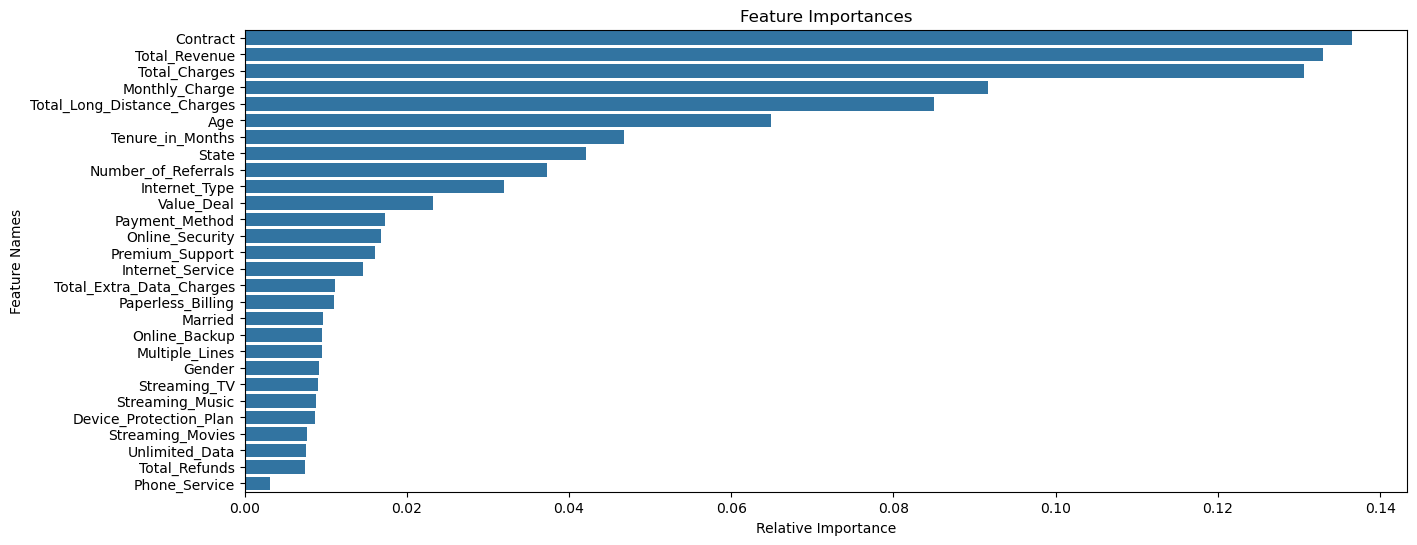

In [29]:

# Make predictions

y_pred = rf_model.predict(X_test)

 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()



### Use Model for Prediction on New Data


In [33]:

# Define the path to the Joiner Data Excel file
file_path = r"D:\Projects\PowerBI\Prediction_Data.xlsx"
 

# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

 

# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data

print(new_data.head())

 

# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   13058-MAD  Female   58      No  Madhya Pradesh                   13   
1   13123-BIH  Female   46      No           Bihar                   13   
2   15591-KAR  Female   26      No       Karnataka                    3   
3   21165-DEL  Female   38      No           Delhi                    2   
4   21247-ASS    Male   58     Yes           Assam                    2   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                22        NaN           Yes             No  ...   
1                18     Deal 5           Yes             No  ...   
2                31        NaN           Yes             No  ...   
3                32     Deal 5           Yes             No  ...   
4                 2        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      46.099998    130.149994           0.0   
1  Bank Wi

In [31]:
# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"D:\Projects\PowerBI\Predictions.csv", index=False)